# 📊 Fundamentos de métricas y evaluación de usuarios
Sesión 1 - Ciencia de Datos y Producto

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style="whitegrid", palette="pastel")


### 🎯 Objetivo de la sesión
Comprender las métricas clave para evaluar el desempeño del negocio y el comportamiento de los usuarios en productos digitales, y aplicarlas en un ejemplo práctico.


### 1️⃣ Facturación, beneficios y rentabilidad

📘 **Concepto:**  
Métricas financieras que permiten entender la salud económica de un producto o servicio.

💡 **Intuición:**  
¿Estamos ganando dinero? ¿En qué etapa lo ganamos o lo perdemos?

🛠️ **Aplicaciones:**  
Análisis de costos, estrategias de precios y control de márgenes.

### 2️⃣ ROI y ROMI

📘 **Concepto:**  
- ROI = (Beneficio neto − Inversión) / Inversión  
- ROMI = Beneficio bruto generado por campaña / Gasto de campaña

💡 **Intuición:**  
¿Valió la pena la inversión? ¿Cuánto recuperamos por cada peso invertido?

🛠️ **Aplicaciones:**  
Comparación de campañas, canales o productos.

### 3️⃣ Embudos de conversión

📘 **Concepto:**  
Representan las etapas por las que pasa un usuario hasta completar una acción.

💡 **Ejemplo:**  
1000 impresiones → 100 clics → 10 conversiones

🛠️ **Aplicaciones:**  
Diagnóstico de pérdida de usuarios en cada etapa.

### 4️⃣ CTR y CR

📘 **Concepto:**  
- CTR = clics / impresiones * 100  
- CR = conversiones / clics * 100

💡 **Intuición:**  
CTR mide atención; CR mide convencimiento.

🛠️ **Aplicaciones:**  
Evaluación de campañas y páginas de destino.

### 5️⃣ DAU, WAU, MAU

📘 **Concepto:**  
Usuarios activos únicos por día, semana o mes.

💡 **Intuición:**  
Reflejan frecuencia de uso.

🛠️ **Aplicaciones:**  
Evaluar engagement o crecimiento.

### 6️⃣ Sticky Factor

📘 **Concepto:**  
Sticky Factor = DAU / WAU

💡 **Intuición:**  
¿Qué proporción de usuarios regresa cada día?

🛠️ **Aplicaciones:**  
Medición de retención a corto plazo.

### 7️⃣ Duración y frecuencia de sesiones

📘 **Concepto:**  
- ASL: duración promedio de sesión  
- Número de sesiones por usuario

💡 **Intuición:**  
Cuánto tiempo y cuán frecuente usan el producto.

🛠️ **Aplicaciones:**  
Diagnóstico de profundidad de uso.

### 8️⃣ Framework HEART

📘 **Concepto:**  
Evaluación UX: Happiness, Engagement, Adoption, Retention, Task Success

💡 **Intuición:**  
¿Es útil, agradable y efectivo?

🛠️ **Aplicaciones:**  
Medición de experiencia de usuario.

### 9️⃣ Framework AARRR

📘 **Concepto:**  
Ciclo de vida del usuario: Acquisition, Activation, Retention, Referral, Revenue

💡 **Intuición:**  
Detecta cuellos de botella en crecimiento.

🛠️ **Aplicaciones:**  
Diseño de estrategias de producto.

# Ejercicios prácticos

In [ ]:
import pandas as pd


### 🧪 Análisis de  campañas 

#### Carga de datos y exploración

In [ ]:
visits =pd.read_csv("https://raw.githubusercontent.com/zyntonyson/bootcamp_ds_da/refs/heads/main/datasets/visits.csv")
orders =pd.read_csv("https://raw.githubusercontent.com/zyntonyson/bootcamp_ds_da/refs/heads/main/datasets/orders.csv")
campaigns_details =pd.read_csv("https://raw.githubusercontent.com/zyntonyson/bootcamp_ds_da/refs/heads/main/datasets/campaigns_details.csv")

In [ ]:
print(orders.info())
print(campaigns_details.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400263 entries, 0 to 400262
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   uuid_user         400263 non-null  object
 1   ts_visits         400263 non-null  object
 2   campaign          400263 non-null  int64 
 3   uuid_interaction  400263 non-null  object
 4   convertion        400263 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 15.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86017 entries, 0 to 86016
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   uuid_interaction  86017 non-null  object
 1   transaction_ts    86017 non-null  object
 2   items             86017 non-null  int64 
 3   amount            86017 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.6+ MB
None


#### `Visits` EDA e ingenieria de características

In [12]:
visits.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400263 entries, 0 to 400262
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   uuid_user         400263 non-null  object        
 1   ts_visits         400263 non-null  datetime64[ns]
 2   campaign          400263 non-null  int64         
 3   uuid_interaction  400263 non-null  object        
 4   convertion        400263 non-null  int64         
 5   date_visits       400263 non-null  object        
 6   dow               400263 non-null  category      
dtypes: category(1), datetime64[ns](1), int64(2), object(3)
memory usage: 18.7+ MB


In [13]:
visits.head()

,uuid_user,ts_visits,campaign,uuid_interaction,convertion,date_visits,dow
0,c8217a67-705e-5176-8575-c5e701a75832,2025-05-29 13:59:07.034402,6,546d77ad-bb6b-57aa-87d9-956ab5dea217,0,2025-05-29,Thursday
1,ffbe64a4-dbba-58b8-a95c-1dddc95c971b,2025-05-07 11:29:06.034402,3,b90e348b-af69-5338-9ab0-00c1b47aa6fb,0,2025-05-07,Wednesday
2,ffbe64a4-dbba-58b8-a95c-1dddc95c971b,2025-05-11 22:29:16.034402,4,be40765f-242b-5ea2-a741-bf4e07462678,0,2025-05-11,Sunday
3,33886b5e-cbf8-5eaa-bd3a-ea2799fc2dd7,2025-06-11 13:59:58.034402,4,7476855a-928a-5ce3-bb76-106b57bc0058,0,2025-06-11,Wednesday
4,ffbe64a4-dbba-58b8-a95c-1dddc95c971b,2025-05-16 07:20:44.034402,4,73034530-5258-5eab-999b-62158894f119,0,2025-05-16,Friday


In [ ]:
visits.describe(include='all')

,uuid_user,uuid_interaction,date_visits
count,400263,400263,400263
unique,50000,400263,41
top,94033d3e-c6ee-5db3-9a35-5cf8f041711c,546d77ad-bb6b-57aa-87d9-956ab5dea217,2025-05-09
freq,21,1,10154


In [5]:
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

visits['ts_visits'] = pd.to_datetime(visits['ts_visits'],errors='coerce')
visits['date_visits'] = visits['ts_visits'].dt.date
visits['dow'] = visits['ts_visits'].dt.day_name()
visits['dow'] = pd.Categorical(visits['dow'], categories=ordered_days, ordered=True)


print( f"Users : {visits.uuid_user.nunique()}")
print( f"Visits : {visits.uuid_interaction.nunique()}")
print( f"Start : {visits.ts_visits.min()}")
print( f"End : {visits.ts_visits.max()}")

Users : 50000
Visits : 400263
Start : 2025-05-05 22:55:10.034402
End : 2025-06-14 22:54:43.034402


* **Muestra  visitas y usuarios únicos por fecha**

In [29]:
df=(
    visits
        .groupby(['date_visits'],as_index=False)
        .agg(
            visitas = ('uuid_interaction','nunique'),
            usuarios_unicos = ('uuid_user','nunique'),
        )
        .sort_values(by='date_visits')
)
df.head()

,date_visits,visitas,usuarios_unicos
0,2025-05-05,466,464
1,2025-05-06,9997,9036
2,2025-05-07,9959,9068
3,2025-05-08,9997,9065
4,2025-05-09,10154,9215


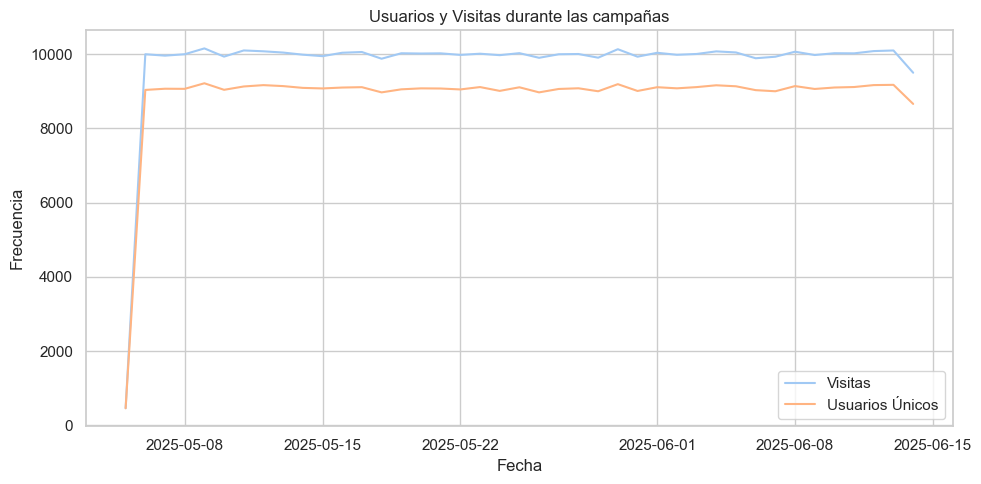

In [30]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='date_visits', y='visitas', label='Visitas')
sns.lineplot(data=df, x='date_visits', y='usuarios_unicos', label='Usuarios Únicos')

plt.title("Usuarios y Visitas durante las campañas")
plt.xlabel("Fecha")
plt.ylabel("Frecuencia")
plt.legend()
plt.tight_layout()
plt.show()

* **Muestra la conversión diaria por campaña** 

In [33]:
(
    visits
        .groupby(['campaign'],as_index=False)
        .agg(
            visitas = ('uuid_interaction','nunique'),
            convertions = ('convertion','sum'),
        )
        .assign(
            rate_convertion_daily = lambda df: (df.convertions/df.visitas).round(3)
        )
        .sort_values(by='rate_convertion_daily',ascending=False)
)

,campaign,visitas,convertions,rate_convertion_daily
3,4,113425,32025,0.282
2,3,95459,22938,0.240
5,6,95565,22961,0.240
1,2,43396,4676,0.108
4,5,26167,1726,0.066
0,1,26251,1691,0.064


In [34]:
df=(
    visits
        .groupby(['date_visits','campaign'],as_index=False)
        .agg(
            visitas = ('uuid_interaction','nunique'),
            convertions = ('convertion','sum'),
        )
        .assign(
            rate_convertion_daily = lambda df: (df.convertions/df.visitas).round(3)
        )
        .sort_values(by='date_visits')
)
df.head()

,date_visits,campaign,visitas,convertions,rate_convertion_daily
0,2025-05-05,1,32,0,0.000
1,2025-05-05,2,44,2,0.045
2,2025-05-05,3,122,28,0.230
3,2025-05-05,4,133,40,0.301
4,2025-05-05,5,35,3,0.086


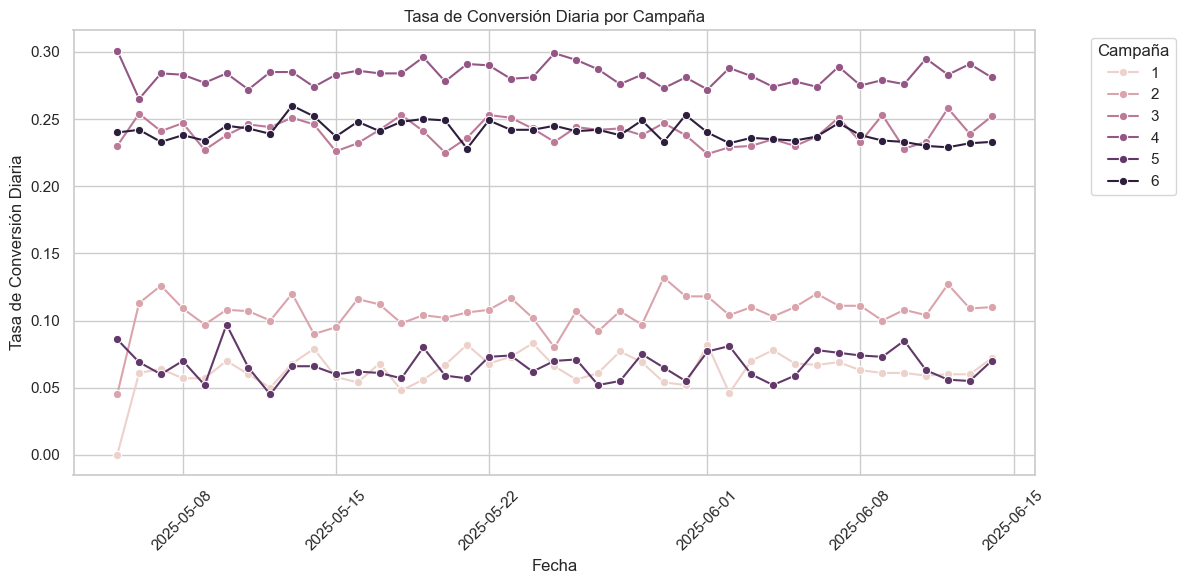

In [35]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date_visits', y='rate_convertion_daily', hue='campaign', marker='o')

plt.title("Tasa de Conversión Diaria por Campaña")
plt.xlabel("Fecha")
plt.ylabel("Tasa de Conversión Diaria")
plt.legend(title="Campaña", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 📈 Cálculo de CTR y CR por campaña

In [ ]:
# Agrupamos y contamos eventos
pivot = df.pivot_table(index='campania', columns='evento', aggfunc='size', fill_value=0)
pivot["CTR"] = pivot["clic"] / pivot["impresion"]
pivot["CR"] = pivot["conversion"] / pivot["clic"]
pivot[["CTR", "CR"]] * 100  # en porcentaje


### ✅ Conclusión
Este ejercicio ilustra cómo se pueden usar métricas simples para entender el rendimiento de una campaña y el comportamiento de los usuarios. En la siguiente sesión exploraremos análisis más avanzados como cohortes y economía unitaria.